**WHO Suicide Analysis and Visualizations**

In [1]:
!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5428 sha256=340055316d3b37208c35125b02ffa40c8be7302313ec0ec2c49f2167d11f392c
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [2]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.figure_factory as ff

from bubbly.bubbly import bubbleplot

import plotly.tools as tls
import squarify
from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

# for providing path
import os
print(os.listdir('../input/'))

['who_suicide_statistics.csv']


**Importing the Dataset**

In [3]:
data = pd.read_csv('../input/who_suicide_statistics.csv')

data = data.sort_values(['year'], ascending = True)

print(data.shape)

(43776, 6)


In [4]:
# let's check the total number of countries' data available for suicidal analysis

print("No. of Countries available for analysis :", data['country'].nunique())


No. of Countries available for analysis : 141


In [5]:
# checking the head of the table

dat = ff.create_table(data.head())
py.iplot(dat)

In [6]:
# let's describe the data

dat = ff.create_table(data.describe())
py.iplot(dat)


In [7]:
# renaming the columns

data.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)

data.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [8]:
# checkinng the null values in the dataset

data.isnull().sum()

country          0
year             0
gender           0
age              0
suicides      2256
population    5460
dtype: int64

In [9]:
# filling missing values

data['suicides'].fillna(0, inplace = True)
# data['population'].mean()
data['population'].fillna(1664090, inplace = True)

# checking if there is any null value left
data.isnull().sum().sum()

# converting these attributes into integer format
data['suicides'] = data['suicides'].astype(int)
data['population'] = data['population'].astype(int)

## Data Visualization

In [10]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'suicides', y_column ='population', 
    bubble_column = 'country',  color_column = 'country', 
    x_title = "Number of Suicides", y_title = "Population", title = 'Population vs Suicides',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

> > > > 

* 非洲和亚洲的自杀率高于其他地方(且行且珍惜)

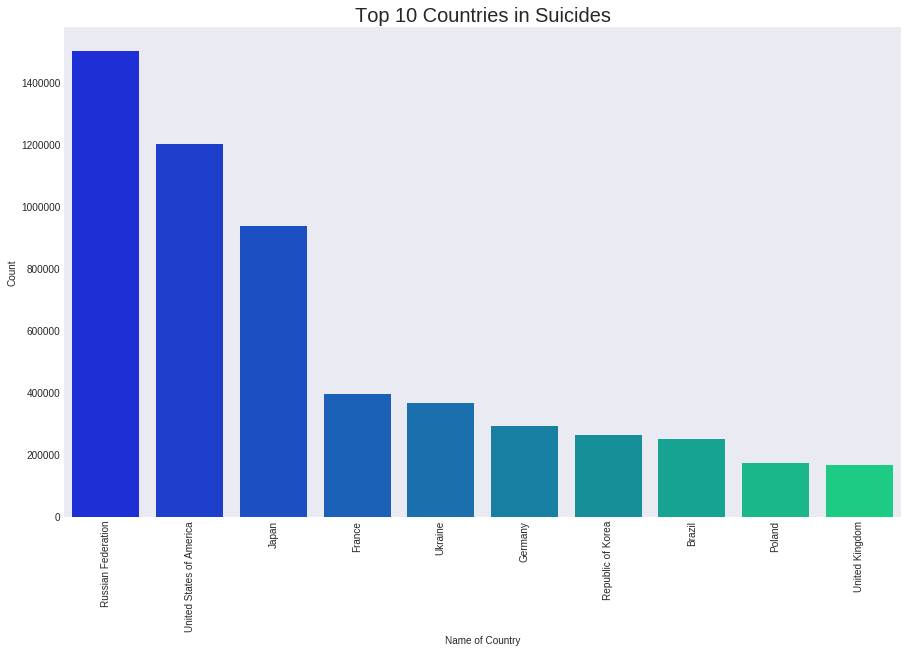

In [11]:
# visualising the different countries distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 9)

color = plt.cm.winter(np.linspace(0, 10, 100))
x = pd.DataFrame(data.groupby(['country'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['country'].head(10), y = x['suicides'].head(10), data = x, palette = 'winter')
plt.title('Top 10 Countries in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

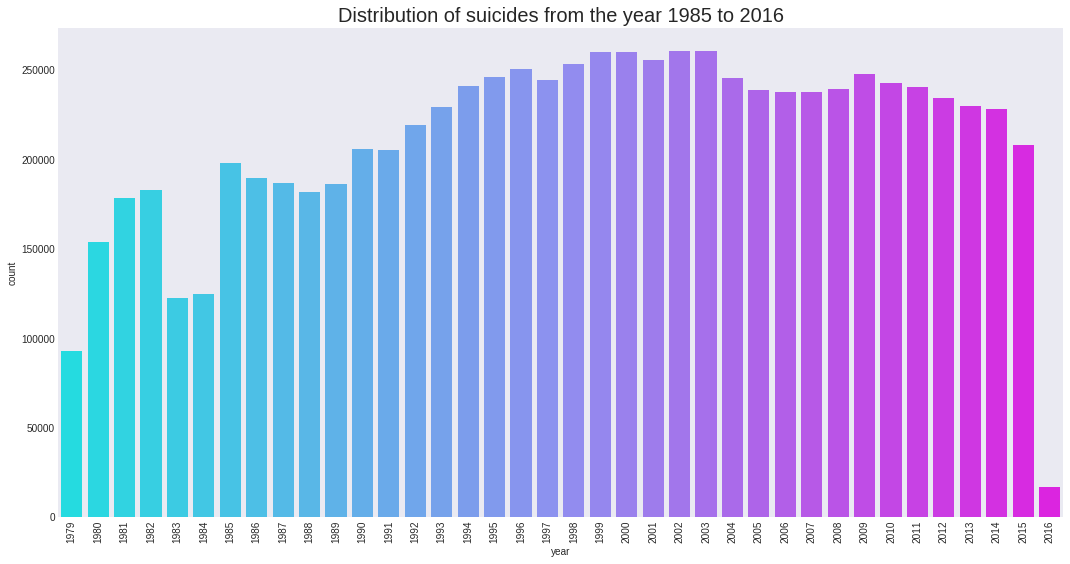

In [12]:
# visualising the different year distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['year'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['year'], y = x['suicides'], data = x, palette = 'cool')
plt.title('Distribution of suicides from the year 1985 to 2016', fontsize = 20)
plt.xlabel('year')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

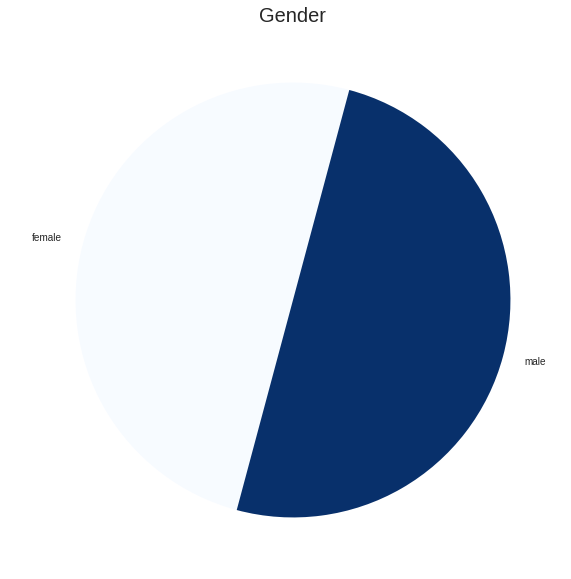

In [13]:

color = plt.cm.Blues(np.linspace(0, 1, 2))
data['gender'].value_counts().plot.pie(colors = color, figsize = (10, 10), startangle = 75)

plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.show()

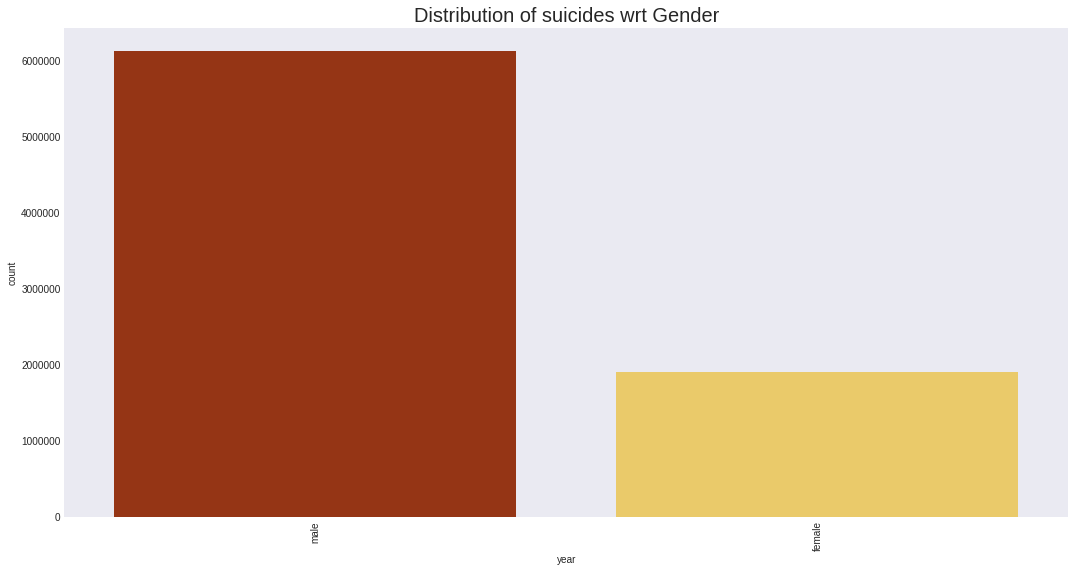

In [14]:
# visualising the different year distribution in the dataset

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (18, 9)

x = pd.DataFrame(data.groupby(['gender'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['gender'], y = x['suicides'], data = x, palette = 'afmhot')
plt.title('Distribution of suicides wrt Gender', fontsize = 20)
plt.xlabel('year')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

## Geospatial Analysis for Suicides

In [15]:

suicide = pd.DataFrame(data.groupby(['country','year'])['suicides'].sum().reset_index())

count_max_sui=pd.DataFrame(suicide.groupby('country')['suicides'].sum().reset_index())

count = [ dict(
        type = 'choropleth',
        locations = count_max_sui['country'],
        locationmode='country names',
        z = count_max_sui['suicides'],
        text = count_max_sui['country'],
        colorscale = 'Cividis',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
)]
layout = dict(
    title = 'Suicides happening across the Globe',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)
fig = dict( data=count, layout=layout )
iplot(fig, validate=False, filename='d3-world-map')

In [16]:
# looking at the Suicides in USA.

data[data['country'] == 'United States of America'].sample(20)

country  year  gender          age  suicides  \
42157  United States of America  1999  female  25-34 years       912   
42333  United States of America  2013    male   5-14 years       252   
42152  United States of America  1998    male  35-54 years      9192   
41962  United States of America  1982    male  55-74 years      4890   
41994  United States of America  1985    male  15-24 years      4267   
42226  United States of America  2004    male  55-74 years      4989   
42335  United States of America  2013    male    75+ years      2990   
42171  United States of America  2000  female   5-14 years        63   
41916  United States of America  1979  female  15-24 years      1001   
42192  United States of America  2002  female  15-24 years       578   
41931  United States of America  1980  female   5-14 years        26   
42284  United States of America  2009    male  35-54 years     11613   
42182  United States of America  2001  female  35-54 years      2893   
42257  United States of America  2007  female    75+ years       411   
42191  United States of America  2001    male    75+ years      2549   
42295  United States of America  2010    male  25-34 years      4645   
42368  United States of America  2016    male  35-54 years         0   
42206  United States of America  2003  female  35-54 years      3058   
42145  United States of America  1998  female  25-34 years       961   
42009  United States of America  1986    male   5-14 years       199   

       population  
42157    19109524  
42333    21233001  
42152    39000700  
41962    17325000  
41994    19962000  
42226    22427063  
42335     7816638  
42171    20034103  
41916    21039000  
42192    19768514  
41931    17029000  
42284    42932194  
42182    42567863  
42257    11421017  
42191     6285825  
42295    20409866  
42368    41481607  
42206    42997878  
42145    19520600  
42009    17338000

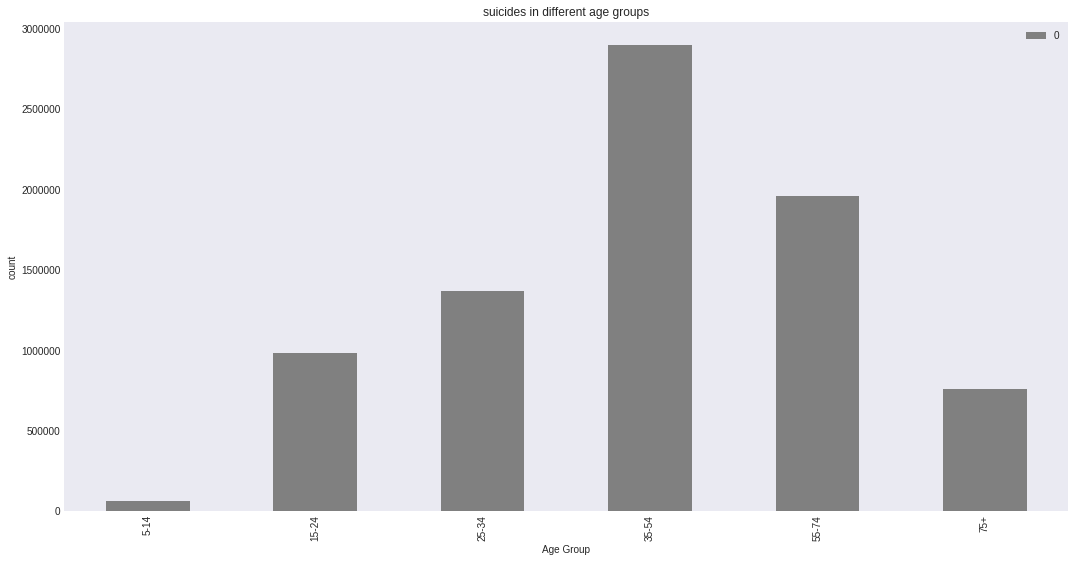

In [17]:
# replacing categorical values in the age column

data['age'] = data['age'].replace('5-14 years', 0)
data['age'] = data['age'].replace('15-24 years', 1)
data['age'] = data['age'].replace('25-34 years', 2)
data['age'] = data['age'].replace('35-54 years', 3)
data['age'] = data['age'].replace('55-74 years', 4)
data['age'] = data['age'].replace('75+ years', 5)

#data['age'].value_counts()

# suicides in different age groups

x1 = data[data['age'] == 0]['suicides'].sum()
x2 = data[data['age'] == 1]['suicides'].sum()
x3 = data[data['age'] == 2]['suicides'].sum()
x4 = data[data['age'] == 3]['suicides'].sum()
x5 = data[data['age'] == 4]['suicides'].sum()
x6 = data[data['age'] == 5]['suicides'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6])
x.index = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
x.plot(kind = 'bar', color = 'grey')

plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()

## Finding Suicide Trends according to Year

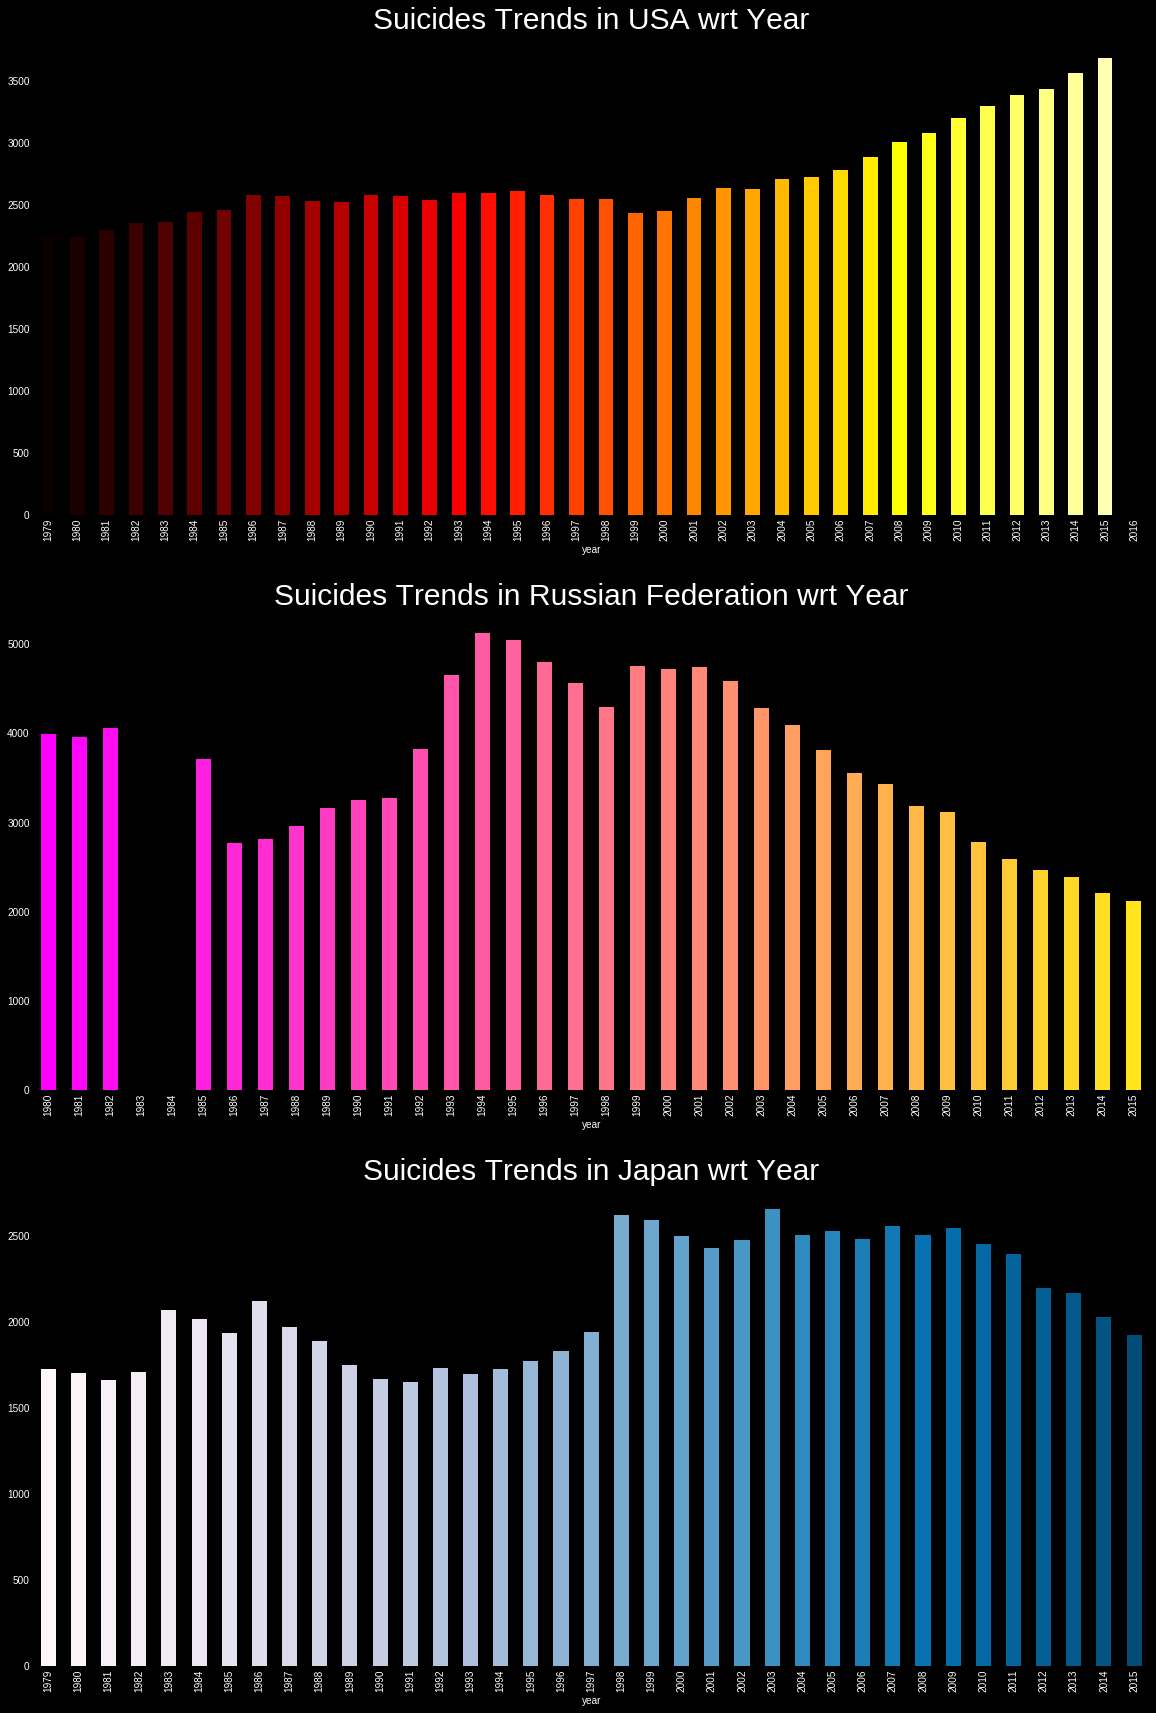

In [18]:
df = data.groupby(['country', 'year'])['suicides'].mean()
df = pd.DataFrame(df)

# looking at the suicides trends for any 3 countries
plt.rcParams['figure.figsize'] = (20, 30)
plt.style.use('dark_background')

plt.subplot(3, 1, 1)
color = plt.cm.hot(np.linspace(0, 1, 40))
df['suicides']['United States of America'].plot.bar(color = color)
plt.title('Suicides Trends in USA wrt Year', fontsize = 30)

plt.subplot(3, 1, 2)
color = plt.cm.spring(np.linspace(0, 1, 40))
df['suicides']['Russian Federation'].plot.bar(color = color)
plt.title('Suicides Trends in Russian Federation wrt Year', fontsize = 30)

plt.subplot(3, 1, 3)
color = plt.cm.PuBu(np.linspace(0, 1, 40))
df['suicides']['Japan'].plot.bar(color = color)
plt.title('Suicides Trends in Japan wrt Year', fontsize = 30)

plt.show()

## Finding Suicide Trends according to Age Groups

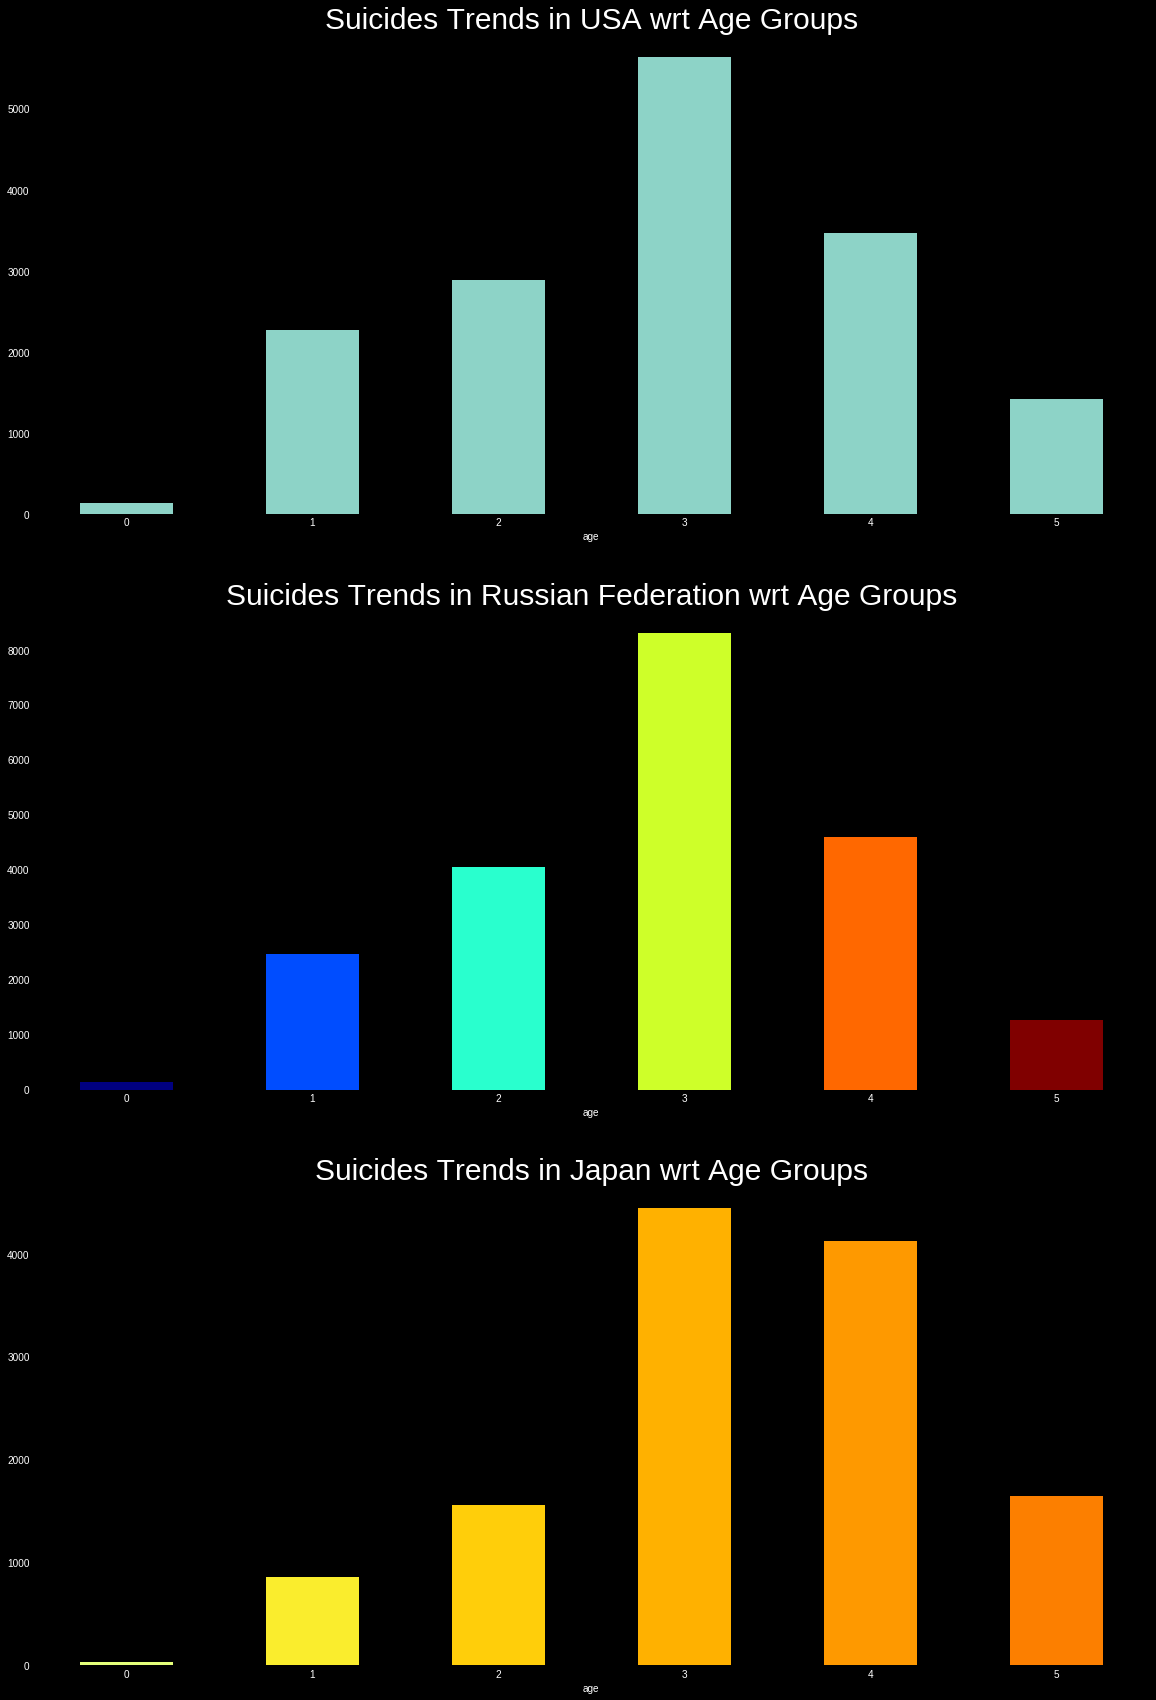

In [19]:
df2 = data.groupby(['country', 'age'])['suicides'].mean()
df2 = pd.DataFrame(df2)

# looking at the suicides trends for any 3 countries
plt.rcParams['figure.figsize'] = (20, 30)

plt.subplot(3, 1, 1)
df2['suicides']['United States of America'].plot.bar()
plt.title('Suicides Trends in USA wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 2)
color = plt.cm.jet(np.linspace(0, 1, 6))
df2['suicides']['Russian Federation'].plot.bar(color = color)
plt.title('Suicides Trends in Russian Federation wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 3)
color = plt.cm.Wistia(np.linspace(0, 1, 6))
df2['suicides']['Japan'].plot.bar(color = color)
plt.title('Suicides Trends in Japan wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.show()

In [ ]:

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('dark_background')

sns.stripplot(data['year'], data['suicides'], palette = 'cool')
plt.title('Year vs Suicides', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# age-group vs suicides

plt.rcParams['figure.figsize'] = (15, 7)


sns.stripplot(data['gender'], data['suicides'], palette = 'Wistia')
plt.title('Age groups vs Suicides', fontsize = 20)
plt.grid()
plt.show()

In [ ]:
# label encoding for gender

from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

data['gender'].value_counts()

In [ ]:
# deleting unnecassary column

data = data.drop(['country'], axis = 1)

data.columns

In [ ]:
#splitting the data into dependent and independent variables

x = data.drop(['suicides'], axis = 1)
y = data['suicides']

print(x.shape)
print(y.shape)

In [ ]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# min max scaling

import warnings
warnings.filterwarnings('ignore')

# importing the min max scaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# scaling the independent variables
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

## Models to Predict Suicides

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the model
model = LinearRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


### Ada Boost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# creating the model
model = AdaBoostRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


## Comparing the Results

In [ ]:
r2_score = np.array([0.385, 0.851, 0.745, 0.535])
labels = np.array(['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost Tree'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
rmse = np.array([600, 295, 388, 521])
labels = np.array(['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost Tree'])
indices = np.argsort(rmse)
color = plt.cm.spring(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18, 7)

plt.bar(range(len(indices)), rmse[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('RMSE', fontsize = 30)

plt.grid()
plt.tight_layout()
plt.show()